In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\3_monthly_campaigns_events.csv")

In [5]:
df

,date,campaign,source,shows,clicks,conversions
0,2022-11-01,2,1,78799,1163,58
1,2022-11-01,2,2,421402,9046,24
2,2022-11-01,2,3,647692,14548,100
3,2022-11-01,1,1,158429,4611,32
4,2022-11-01,1,2,936629,58225,150
...,...,...,...,...,...,...
175,2022-11-30,2,2,314301,5695,21
176,2022-11-30,2,3,553240,10542,40
177,2022-11-30,1,1,132136,4981,34
178,2022-11-30,1,2,511290,24376,424


In [6]:
def  data_info(*datas):
  for data in datas:
      display(data.info())
      display(data.describe())
      display(data.isna().mean().sort_values(ascending=False))
      print('\n')

data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         180 non-null    object
 1   campaign     180 non-null    int64 
 2   source       180 non-null    int64 
 3   shows        180 non-null    int64 
 4   clicks       180 non-null    int64 
 5   conversions  180 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.6+ KB


None

,campaign,source,shows,clicks,conversions
count,180.000000,180.000000,1.800000e+02,180.000000,180.000000
mean,1.500000,2.000000,4.176183e+05,17753.744444,261.427778
std,0.501395,0.818774,3.012604e+05,22272.742468,563.538016
min,1.000000,1.000000,5.000000e+01,1.000000,0.000000
25%,1.000000,1.000000,1.475855e+05,5357.750000,34.000000
50%,1.500000,2.000000,3.649970e+05,10364.000000,63.500000
75%,2.000000,3.000000,5.830062e+05,17094.750000,395.750000
max,2.000000,3.000000,1.375289e+06,99766.000000,4213.000000


date           0.0
campaign       0.0
source         0.0
shows          0.0
clicks         0.0
conversions    0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

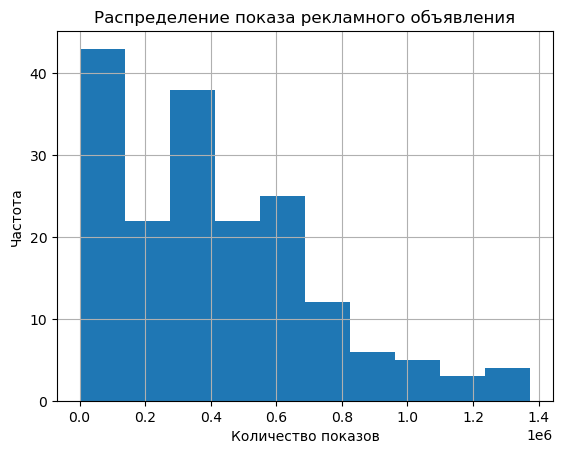

In [58]:
df['shows'].hist()
plt.title('Распределение показа рекламного объявления')
plt.xlabel('Количество показов')
plt.ylabel('Частота')
plt.show()

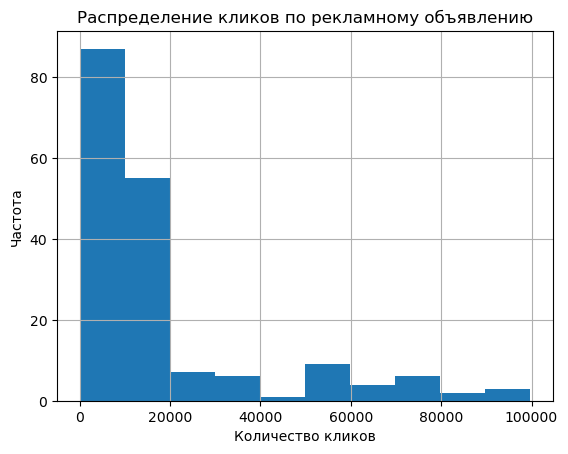

In [55]:
df['clicks'].hist()
plt.title('Распределение кликов по рекламному объявлению')
plt.xlabel('Количество кликов')
plt.ylabel('Частота')
plt.show()

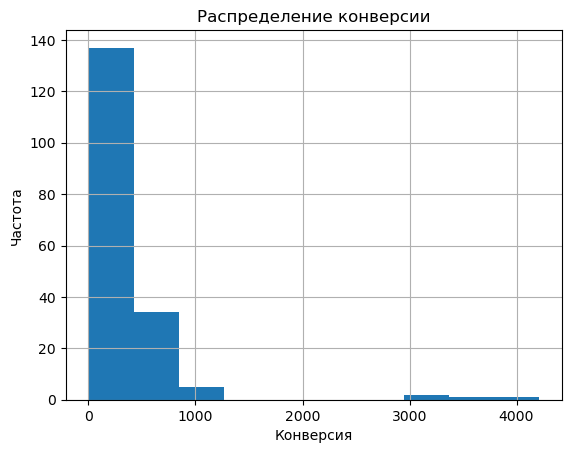

In [57]:
df['conversions'].hist()
plt.title('Распределение конверсии')
plt.xlabel('Конверсия')
plt.ylabel('Частота')
plt.show()

In [32]:
df.sample()

,date,campaign,source,shows,clicks,conversions
146,2022-11-25,2,3,508459,9476,75


In [38]:
df.groupby('date')['conversions'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
date,,
2022-11-13,6,868.666667
2022-11-08,6,770.500000
2022-11-22,6,676.000000
2022-11-04,6,641.166667
2022-11-16,6,309.500000
2022-11-28,6,300.666667
2022-11-21,6,299.666667
2022-11-29,6,261.333333
2022-11-24,6,257.000000


Видно, что конверсия повышается в середине месяца, что может быть связано с тем, что пользователи обычно реагируют на рекламные кампании после некоторого времени их запуска.

In [39]:
df.groupby('campaign')['conversions'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
campaign,,
1,90,471.077778
2,90,51.777778


In [40]:
df.groupby('source')['conversions'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
source,,
2,60,435.666667
3,60,289.616667
1,60,59.000000


In [44]:
df['shows_cut'] = pd.qcut(df['shows'], 5)

In [49]:
df.groupby('shows_cut')['conversions'].agg(['count','mean']).sort_values(ascending=False,by='mean')

C:\Users\user\AppData\Local\Temp\ipykernel_29616\2220371885.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('shows_cut')['conversions'].agg(['count','mean']).sort_values(ascending=False,by='mean')


,count,mean
shows_cut,,
"(650256.0, 1375289.0]",36,719.666667
"(437138.8, 650256.0]",36,346.138889
"(308038.4, 437138.8]",36,126.444444
"(121810.6, 308038.4]",36,70.138889
"(49.999, 121810.6]",36,44.750000


Чем больше показов, тем высше конверсия

In [53]:
df['clicks_cut'] = pd.qcut(df['clicks'], 5)

In [54]:
df.groupby('clicks_cut')['conversions'].agg(['count','mean']).sort_values(ascending=False,by='mean')

C:\Users\user\AppData\Local\Temp\ipykernel_29616\1847010959.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('clicks_cut')['conversions'].agg(['count','mean']).sort_values(ascending=False,by='mean')


,count,mean
clicks_cut,,
"(20690.0, 99766.0]",36,812.111111
"(12623.8, 20690.0]",36,330.416667
"(6579.0, 12623.8]",36,83.611111
"(0.999, 3519.0]",36,51.833333
"(3519.0, 6579.0]",36,29.166667


In [98]:
df.groupby('date')['clicks'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
date,,
2022-11-08,6,29718.666667
2022-11-24,6,29311.833333
2022-11-12,6,26049.666667
2022-11-16,6,25920.833333
2022-11-06,6,25540.666667
2022-11-04,6,23993.000000
2022-11-26,6,21613.833333
2022-11-28,6,21169.666667
2022-11-23,6,20765.666667


In [99]:
df.groupby('date')['shows'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
date,,
2022-11-09,6,567487.166667
2022-11-07,6,564718.833333
2022-11-08,6,532326.333333
2022-11-03,6,516709.500000
2022-11-27,6,510252.333333
2022-11-13,6,505127.500000
2022-11-05,6,498600.833333
2022-11-23,6,494095.666667
2022-11-02,6,478783.500000


Аналогично со кликами

In [93]:
df['CR'] = (df['conversions'] / df['clicks']) * 100
df['CTR'] = (df['clicks'] / df['shows']) * 100

df

,date,campaign,source,shows,clicks,conversions,shows_cut,clicks_cut,CR,CTR
0,2022-11-01,2,1,78799,1163,58,"(49.999, 121810.6]","(0.999, 3519.0]",4.987102,1.475907
1,2022-11-01,2,2,421402,9046,24,"(308038.4, 437138.8]","(6579.0, 12623.8]",0.265311,2.146644
2,2022-11-01,2,3,647692,14548,100,"(437138.8, 650256.0]","(12623.8, 20690.0]",0.687380,2.246129
3,2022-11-01,1,1,158429,4611,32,"(121810.6, 308038.4]","(3519.0, 6579.0]",0.693993,2.910452
4,2022-11-01,1,2,936629,58225,150,"(650256.0, 1375289.0]","(20690.0, 99766.0]",0.257621,6.216442
...,...,...,...,...,...,...,...,...,...,...
175,2022-11-30,2,2,314301,5695,21,"(308038.4, 437138.8]","(3519.0, 6579.0]",0.368745,1.811957
176,2022-11-30,2,3,553240,10542,40,"(437138.8, 650256.0]","(6579.0, 12623.8]",0.379435,1.905502
177,2022-11-30,1,1,132136,4981,34,"(121810.6, 308038.4]","(3519.0, 6579.0]",0.682594,3.769601
178,2022-11-30,1,2,511290,24376,424,"(437138.8, 650256.0]","(20690.0, 99766.0]",1.739416,4.767549


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


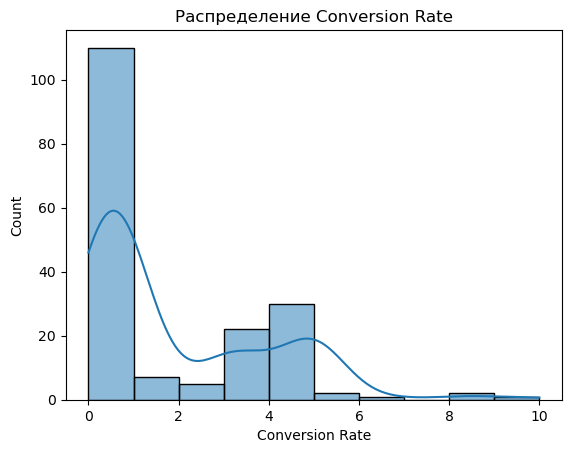

In [73]:
sns.histplot(df['CR'], bins=10, kde=True)
plt.title('Распределение Conversion Rate')
plt.xlabel('Conversion Rate')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


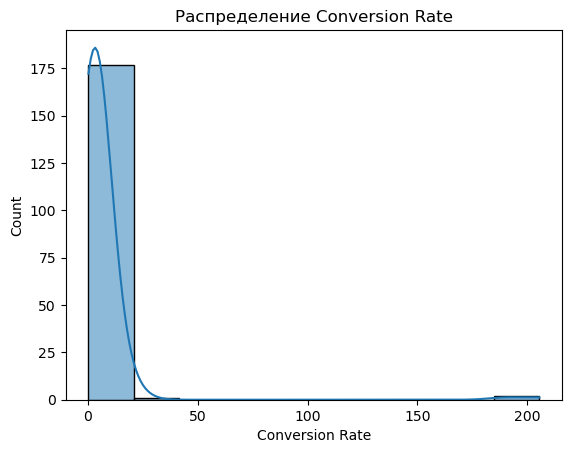

In [74]:
sns.histplot(df['CTR'], bins=10, kde=True)
plt.title('Распределение Conversion Rate')
plt.xlabel('Conversion Rate')
plt.show()

In [75]:
max_cr_campaign = df.loc[df['CR'].idxmax(), 'campaign']

In [76]:
max_cr_campaign

2

In [78]:
max_ctr_campaign = df.loc[df['CTR'].idxmax(), 'campaign']

In [79]:
max_ctr_campaign

2

По CR и CTR лучше всего показала себя вторая рекламная компания.

In [81]:
df.columns

Index(['date', 'campaign', 'source', 'shows', 'clicks', 'conversions',
       'shows_cut', 'clicks_cut', 'CR', 'CTR'],
      dtype='object')

In [84]:
df.groupby('campaign')['CR'].agg(['count','mean'])

,count,mean
campaign,,
1,90,1.753202
2,90,2.105985


In [86]:
df.groupby('campaign')['CTR'].agg(['count','mean'])

,count,mean
campaign,,
1,90,5.277395
2,90,6.516956


In [89]:
df.groupby('source')['CR'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
source,,
1,60,2.830893
3,60,1.777911
2,60,1.179977


In [90]:
df.groupby('source')['CTR'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
source,,
3,60,11.308028
2,60,3.640630
1,60,2.742868


In [91]:
df.groupby('date')['CTR'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
date,,
2022-11-12,6,39.281837
2022-11-28,6,36.116865
2022-11-24,6,7.247159
2022-11-06,6,6.651224
2022-11-20,6,6.126043
2022-11-04,6,5.716193
2022-11-16,6,5.423936
2022-11-08,6,4.978283
2022-11-14,6,3.785060


Как видно есть законоиерность между датой и конверсией. Реклама начинает работать со середины месяца после начало рекламной компании.

In [92]:
df.groupby('date')['CR'].agg(['count','mean']).sort_values(ascending=False,by='mean')

,count,mean
date,,
2022-11-22,6,3.093646
2022-11-13,6,3.057383
2022-11-20,6,2.940134
2022-11-21,6,2.678717
2022-11-08,6,2.446636
2022-11-04,6,2.184839
2022-11-29,6,2.010587
2022-11-14,6,1.957964
2022-11-15,6,1.896419


### Вывод

После анализа данных и расчёта CR и CTR можно сказать, что для достижения заметного эффекта от рекламной кампании может потребоваться некоторое время, например, две недели.


Это связано с тем, что пользователи обычно требуют времени, чтобы узнать о рекламной кампании, проявить интерес и совершить целевое действие. По истечении определенного периода времени эффект от кампании может начать усиливаться, поскольку пользователи уже успели ознакомиться с предложением и принять решение о действии
.

Таким образом, если результаты показывают, что эффект рекламной кампании становится заметным примерно через две недели, то это может быть признаком того, что минимальное время необходимо для того, чтобы пользователи отреагировали на кампанию и начали проявлять интерес к продукту или услуге.